In [4]:
import os
import sys
sys.path.append("12_16_21")
import fld_tools as ft
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from repmat import repmat
from flds import FldsU
from flds import FldsNU

In [2]:
dims = [288,468,88];
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Joe_aux_data/'#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir = '/nobackup/amondal/Python/Joes_kpp_code/';#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_kpp_save_dir/';#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)



## Build File List

lw = 3; fsize=16;
iters = [2];
cmax = 1e-6;



## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

f = FldsNU();
f.load_mitgcm_data(data_dir,aux_data_dir,iters,dims);
RHOAnoma = f.load_mitgcm_field('RHOAnoma',data_dir,iters,dims);
KPPviscA = f.load_mitgcm_field('KPPviscA',data_dir,iters,dims);
KPPdbloc = f.load_mitgcm_field('KPPdbloc',data_dir,iters,dims);
KPPRi = f.load_mitgcm_field('KPPRi',data_dir,iters,dims);
KPPhbl = f.load_mitgcm_field('KPPhbl',data_dir,iters,dims[0:2]);
KPPdU = f.load_mitgcm_field('Um_ImplD',data_dir,iters,dims);
KPPdV = f.load_mitgcm_field('Vm_ImplD',data_dir,iters,dims);

max S = 35.393211364746094
min S = 0.0
max T = 24.346668243408203
min T = 0.0
max U = 0.8634651899337769
min U = -0.6833522915840149
max V = 0.8318789005279541
min V = -0.6641660928726196
max W = 0.02351987734436989
min W = -0.023023640736937523
min depth = 79.38050079345703
max depth = 6082.06982421875
min thknss = 0.0
max thknss = 400.37952


In [4]:
f.S.shape

(288, 468, 88, 1)

In [2]:
dims = [87, 2400, 2400]; #Hector's code has 87 layers
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/';#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir ='/nobackup/amondal/Python/Joes_kpp_code/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_Hector_kpp_save_dir/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)

In [5]:
len(np.flip(dims))

3

In [3]:
## Build File List

lw = 3; fsize=16;
iters = [798408];
cmax = 1e-6;


## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

#f = FldsNU();

In [4]:
import numpy as np
nt = len(iters);
field = np.empty(dims + [nt])
filename = data_dir + 'S.' + str(iters[0]).rjust(10,'0') + '.data';
fid = open(filename, 'rb')
f = np.fromfile(fid, dtype=np.dtype('>f4'), count = np.prod(dims))

In [10]:
2400*2400*87

501120000

In [5]:
dims = [87, 2400, 2400];
ndims = len(dims);
Pfield = np.zeros(dims);
for k in range(0,dims[0]):
    for j in range(0,dims[1]):
        i1 = k*dims[1]*dims[2] + j*dims[2]
        i2 = i1+dims[2];
        Pfield[k,j,:] = f[i1:i2];

In [10]:
np.nansum(Pfield - S)

0.0

In [15]:
Pfield.shape

(87, 2400, 2400)

In [13]:
Pfield_switch = np.swapaxes(Pfield, 0, 2)

In [17]:
Pfield_switch.shape

(2400, 2400, 87)

In [15]:
f[i1:i2].shape

(2400,)

In [21]:
f[0:2400]

array([33.821148, 33.821148, 33.821148, ..., 33.77457 , 33.77457 ,
       33.77457 ], dtype=float32)

In [16]:
S[0,0, 0:2400]

NameError: name 'S' is not defined

In [20]:
2400*2400

5760000

In [15]:
(f[5760001:5762401] - S[1,0, 0:2400]).sum()
#(f[2401:4801] - S[0,0:2400]).sum()

NameError: name 'S' is not defined

In [5]:
f.S = ft.rdmds(data_dir + 'S',iters, [2400, 2400, 87], 'S');

max S = 34.699256896972656
min S = 0.0


AttributeError: 'numpy.ndarray' object has no attribute 'S'

In [5]:
f.S.shape

(87, 2400, 2400, 1)

In [7]:
300*300*87

7830000

In [15]:
f.shape

(7830000,)

In [8]:
field[:,:,:,0] = ft.switch_row_column_major(f,dims);

In [9]:
field.shape

(87, 300, 300, 1)

In [15]:
lonc = ft.read_bin(aux_data_dir + 'LONC', (1, 2400, 2400));

In [16]:
lonc.shape

(1, 2400, 2400)

In [6]:
lonc = ft.read_bin(aux_data_dir + 'LONC', (1, 2400, 2400));
long = ft.read_bin(aux_data_dir + 'LONG', (1, 2400, 2400));
latc = ft.read_bin(aux_data_dir + 'LATC', (1, 2400, 2400));
latg = ft.read_bin(aux_data_dir + 'LATG', (1, 2400, 2400));

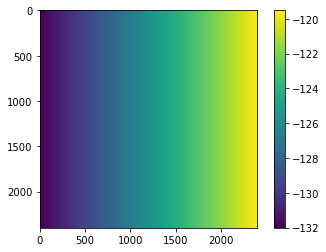

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(lonc[0, :, :])
plt.colorbar()

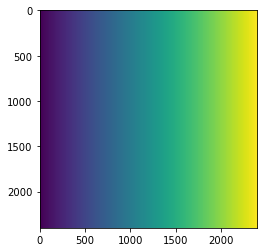

In [8]:
%matplotlib inline
plt.imshow(c.lon)

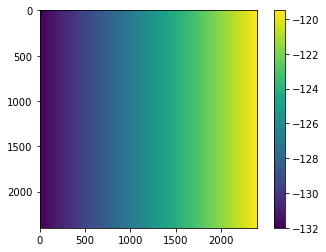

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(long[0, :,:])
plt.colorbar()

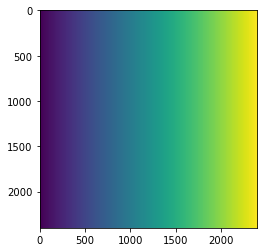

In [9]:
%matplotlib inline
plt.imshow(c.long)

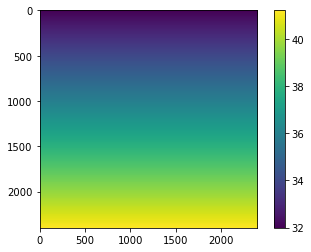

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(latc[0, :, :])
plt.colorbar()

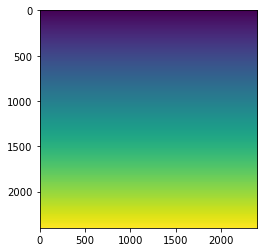

In [10]:
%matplotlib inline
plt.imshow(c.lat)

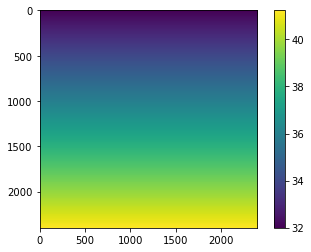

In [11]:
plt.imshow(latg[0,:,:])
plt.colorbar()

In [1]:
import os
import sys
sys.path.append("12_16_21")
import numpy as np
import fld_tools as ft
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from repmat import repmat
from flds import FldsU
from flds import FldsNU
#sys.path.append('/nobackup/htorresg/DopplerScat/modelling/GS/programs/tools')
sys.path.append('/u/htorresg/Experiment_CCS/programas/tools')
sys.path.append('/nobackup/amondal/Python/CCS_Analysis')
import handle_mitgcm as model
import params_500mSNAPS_joecode as p


dims = [87, 2400,2400]; #Hector's code has 87 layers # I think switching the height might fix the switch_column_row function (7/7/22)
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/';#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir ='/nobackup/amondal/Python/Joes_kpp_code/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_Hector_kpp_save_dir/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)



## Build File List

lw = 3; fsize=16;
iters = [798408];
cmax = 1e-6;

c = model.LLChires(p.dirc, p.dirc, p.nx, p.ny, p.nz, p.tini, p.tref, p.tend, p.steps,p.rate, p.timedelta);

## Read in the Data

trim_ml = 30; # in meters
post_hann = [1,1,0]; # this is passed in but not actually used... 

f = FldsNU();
f.load_mitgcm_data(data_dir,aux_data_dir,iters,dims);

max S = 34.699256896972656
min S = 0.0
max T = 24.869728088378906
min T = 0.0
max U = 1.9890766143798828
min U = -1.31050443649292
max V = 1.4741947650909424
min V = -1.354968547821045
max W = 0.12415801733732224
min W = -0.14003032445907593
min depth = 0.0
max depth = 5442.7119140625
delR is missing. I'll try RF instead
max Z = 0.0
min Z = -5681.69
min thknss = 0.0
max thknss = 334.63965


In [110]:
s_switched[100, 0:100, 0:84]

array([[33.8420105 , 33.84169006, 33.84142303, ..., 34.68585205,
        34.68682861, 34.68686295],
       [33.74065399, 33.74490356, 33.7502594 , ..., 34.68628311,
        34.68707657, 34.68713379],
       [33.72477341, 33.72460938, 33.72463608, ..., 34.68623352,
        34.68705368, 34.68713379],
       ...,
       [33.67368317, 33.67308426, 33.67246628, ..., 34.68511963,
        34.68566132, 34.68572617],
       [33.67385483, 33.67366791, 33.67361832, ..., 34.68513107,
        34.68571091, 34.68573761],
       [33.66822433, 33.66824341, 33.66848373, ..., 34.68500519,
        34.68569946, 34.68572998]])

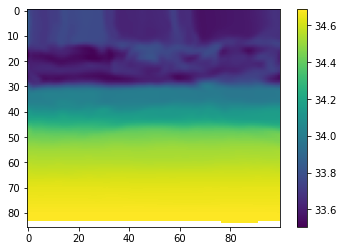

In [104]:
%matplotlib inline
plt.imshow(s_switched[100, 0:100, 0:-1].T)
plt.colorbar()

In [96]:
s_switched[100, 0:100, 0:-1].T

array([[33.8420105 , 33.74065399, 33.72477341, ..., 33.67368317,
        33.67385483, 33.66822433],
       [33.84169006, 33.74490356, 33.72460938, ..., 33.67308426,
        33.67366791, 33.66824341],
       [33.84142303, 33.7502594 , 33.72463608, ..., 33.67246628,
        33.67361832, 33.66848373],
       ...,
       [34.68686295, 34.68713379, 34.68713379, ..., 34.68572617,
        34.68573761, 34.68572998],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [100]:
np.nonzero(f.S[100, 0:100, 0:-1,0].T - s_switch_nan[100, 0:100, 0:-1].T)

(array([], dtype=int64), array([], dtype=int64))

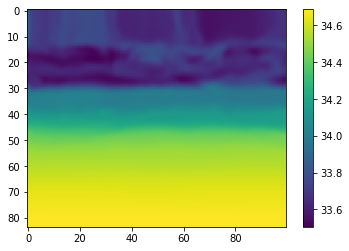

In [111]:
%matplotlib inline
plt.imshow(f.S[100, 0:100, 0:84,0].T)
plt.colorbar()
#

In [70]:
s_switched.shape

(2400, 2400, 87)

In [78]:
s_switched[0:2399, 0:2399,:]

array([[[33.82114792, 33.82074356, 33.82039642, ...,         nan,
                 nan,         nan],
        [33.82114792, 33.82074356, 33.82039642, ...,         nan,
                 nan,         nan],
        [33.82114792, 33.82074356, 33.82039642, ...,         nan,
                 nan,         nan],
        ...,
        [32.67464447, 32.67435455, 32.67409515, ...,         nan,
                 nan,         nan],
        [32.67464447, 32.67435455, 32.67409515, ...,         nan,
                 nan,         nan],
        [32.67464447, 32.67435455, 32.67409515, ...,         nan,
                 nan,         nan]],

       [[33.82114792, 33.82074356, 33.82039642, ...,         nan,
                 nan,         nan],
        [33.82061768, 33.82018661, 33.81978989, ...,         nan,
                 nan,         nan],
        [33.81938934, 33.81896591, 33.81856537, ...,         nan,
                 nan,         nan],
        ...,
        [32.67282867, 32.67253876, 32.67224121, ...,  

In [86]:
np.sum(np.isnan(f.S[:,:,:,0]))

0

In [80]:
s_switch_nan = np.nan_to_num(s_switched)

In [77]:
f.S[:,:,:, 0] - s_switched[0:2399, 0:2399,:]

array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan]],

       ...,

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan

In [67]:
np.nansum(f.S[:,:,:,0] - s_switched[0:2399,0:2399,:])
#s_switched.shape

0.0

In [90]:
np.nonzero((f.S[:,:,:, 0]) - s_switch_nan[0:2399, 0:2399,:])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

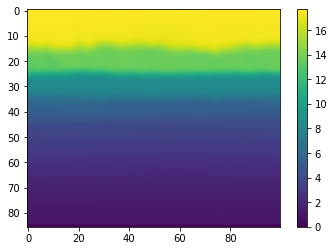

In [29]:
%matplotlib inline
plt.imshow(f.T[100, 300:400, 0:-1,0].T)
plt.colorbar()

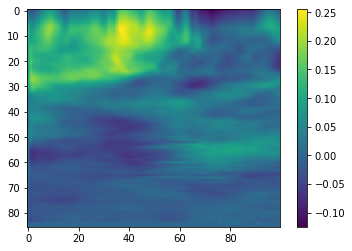

In [61]:
%matplotlib inline
plt.imshow(f.U[100, 0:100, 0:-1,0].T)
plt.colorbar()


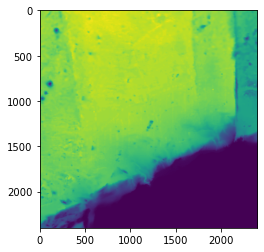

In [11]:
plt.imshow(f.depth[:,:,0,0])

In [47]:
maxlevel = 87
t = c.loadding_3D_data(p.dirc + 'THETA.%010i.data'%iters[0], maxlevel, 'tracer')
s = c.loadding_3D_data(p.dirc + 'SALT.%010i.data'%iters[0], maxlevel, 'tracer')
u = c.loadding_3D_data(p.dirc + 'UVEL.%010i.data'%iters[0], maxlevel, 'uvel')
v = c.loadding_3D_data(p.dirc + 'VVEL.%010i.data'%iters[0], maxlevel, 'vvel')
w = c.loadding_3D_data(p.dirc + 'WVEL.%010i.data'%iters[0], maxlevel, 'wvel')

In [48]:
t_switched = np.swapaxes(t, 0, 2)
s_switched = np.swapaxes(s, 0, 2)
u_switched = np.swapaxes(u, 0, 2)
v_switched = np.swapaxes(v, 0, 2)
w_switched = np.swapaxes(w, 0, 2)

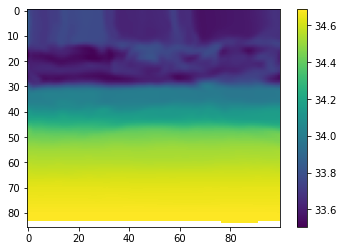

In [63]:
%matplotlib inline
plt.imshow(s_switched[100, 0:100, 0:-1].T)
plt.colorbar()

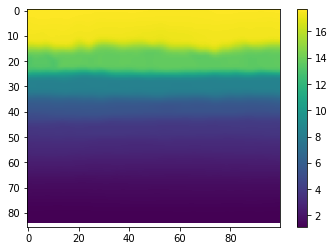

In [23]:
%matplotlib inline
plt.imshow(t_switched[100, 300:400, 0:-1].T)
plt.colorbar()

In [31]:
np.nansum(f.T[100, 300:400, 0:-1,0] - t_switched[100, 300:400, 0:-1])

0.0

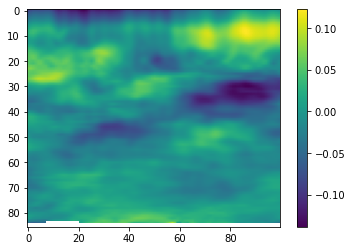

In [44]:
%matplotlib inline
plt.imshow(u_switched[100, 300:400, 0:-1].T)
plt.colorbar()

In [46]:
np.nansum(f.U[100, 300:400, 0:-1,0] - u_switched[100, 300:400, 0:-1])

0.0

check V and W but why is Salt all fucked up? Salt wasn't fucked up it just had a bunch of nans. Plotting with nans is a nightmare.

In [2]:
KPPviscA = f.load_mitgcm_field('KPPviscA',data_dir,iters,dims);

In [3]:
KPPviscA.shape

(2399, 2399, 87, 1)

In [8]:
f.nz

87

In [4]:
%matplotlib inline
plt.imshow(KPPviscA[100, 300:400, 0:-1].T)
plt.colorbar()

IndexError: index 100 is out of bounds for axis 0 with size 87

So we're back to debugging 

In [ ]:
dims = [87, 2400,2400]; #Hector's code has 87 layers # I think switching the height might fix the switch_column_row function (7/7/22)
data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/'#'/scratch/p/peltier/jskitka/runs/2km_109l/kpp_all_on/run/';
aux_data_dir = '/nobackup/amondal/Python/Joes_kpp_code/Hector_Sub_Data/';#'/home/p/peltier/jskitka/aux_data/low_res/';
home_dir ='/nobackup/amondal/Python/Joes_kpp_code/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/';
save_dir = '/nobackup/amondal/Python/Joes_kpp_code/validate_Hector_kpp_save_dir/'#'/scratch/p/peltier/jskitka/diagnostics/kpp_all_on/figures/';
os.chdir(home_dir)

In [11]:
#KPPviscA = f.load_mitgcm_field('KPPviscA',data_dir,iters,dims);
fla = ft.rdmds(data_dir+'KPPviscA', iters, dims)
fla = np.swapaxes(fla, 0, 2)

In [12]:
fla.shape

(2400, 2400, 87, 1)

In [ ]:
(dU,dV,viscAz,dbloc) = f.compute_kpp_diag(post_hann,trim_ml);

in compute_nu_kpp()
viscArNr = 0.00056614
Riinfty = 0.6998


/nobackupp12/amondal/Python/Joes_kpp_code/compute_nu_kpp.py:144: UserWarning: thknss needs adapting for HYCOM, etc.
  warnings.warn("thknss needs adapting for HYCOM, etc.");
/nobackupp12/amondal/Python/Joes_kpp_code/12_16_21/vert_grid_mitgcm.py:18: UserWarning: thknss needs adapting for HYCOM, etc.
  warnings.warn("thknss needs adapting for HYCOM, etc.");
